In [1]:
#What I want to achieve with this project:
    #I want to create a stocastic model to predict the intervals inwhich an asset price will most likely achieve
    #This model will use standard financial model standards i.e. rolling mean for 50 & 200 days to aid in a more accurate prediction
    #For the objective is to use these methods to simply predict tomorrows price, if successful (reasonably) then will try to make 30 & 90 day predictions
    
    #This project is based off previous ML/DL models David & I have tried

In [2]:
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
#from matplotlib.finance import candlestick_ohlc
style.use('ggplot')

import pandas as pd
import pandas_datareader.data as web

import numpy as np

import os

from scipy.stats import norm

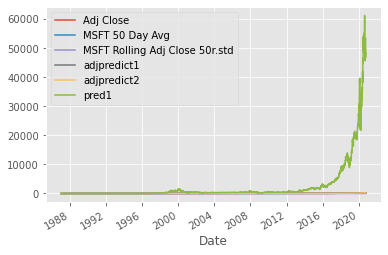

In [3]:
"""#Microsoft Data"""

dfMSFT = web.DataReader('msft','yahoo', start='1987-01-01')

dfMSFT.reset_index(inplace=True)
dfMSFT.set_index("Date", inplace=True)
#dfMSFT = dfMSFT.drop("Symbol", axis=1)


#This code is to scale the OHLC, Vol, & Adj Close into integers. 
#OHLC & Adj Close are in terms of cents
#Volume is a log transformation
dfMSFT['Volume'] = np.around(np.log(dfMSFT['Volume']+1))
dfMSFT = dfMSFT.drop('Volume', axis=1)

dfMSFT['High'] = np.around(dfMSFT['High'], decimals=2)
dfMSFT['Low'] = np.around(dfMSFT['Low'], decimals=2)
dfMSFT['Open'] = np.around(dfMSFT['Open'], decimals=2)
dfMSFT['Close'] = np.around(dfMSFT['Close'], decimals=2)
dfMSFT['Adj Close'] = dfMSFT['Adj Close']
                        #np.around(dfMSFT['Adj Close'], decimals=2)

#Meta Metrics
dfMSFT['MSFT 50 Day Avg'] = dfMSFT['Adj Close'].rolling(50, min_periods=0).mean()
                            #np.around(dfMSFT['Adj Close'].rolling(50, min_periods=0).mean(), decimals=2)
dfMSFT['MSFT 200 Day Avg'] = np.around(dfMSFT['Adj Close'].rolling(200, min_periods=0).mean(), decimals=2)

dfMSFT['MSFT High-Low'] = np.around(dfMSFT['High'] - dfMSFT['Low'], decimals=2)

dfMSFT['MSFT Rolling Adj Close'] = np.around(dfMSFT['Adj Close'].rolling(50, min_periods=0).mean(), decimals=2)

dfMSFT['MSFT Rolling Adj Close 30r.std'] = dfMSFT['MSFT Rolling Adj Close'].rolling(30, min_periods=0).std()
dfMSFT['MSFT Rolling Adj Close 50r.std'] = dfMSFT['MSFT Rolling Adj Close'].rolling(50, min_periods=0).std()
dfMSFT['MSFT Rolling Adj Close 200r.std'] = dfMSFT['MSFT Rolling Adj Close'].rolling(200, min_periods=0).std()

dfMSFT = dfMSFT.drop('High', axis=1)
dfMSFT = dfMSFT.drop('Low', axis=1)
dfMSFT = dfMSFT.drop('Open', axis=1)
dfMSFT = dfMSFT.drop('Close', axis=1)
dfMSFT = dfMSFT.drop('MSFT High-Low', axis=1)
dfMSFT = dfMSFT.drop('MSFT 200 Day Avg', axis=1)
dfMSFT = dfMSFT.drop('MSFT Rolling Adj Close', axis=1)
dfMSFT = dfMSFT.drop('MSFT Rolling Adj Close 30r.std', axis=1)
dfMSFT = dfMSFT.drop('MSFT Rolling Adj Close 200r.std', axis=1)




a1 = dfMSFT['Adj Close']
b1 = dfMSFT['MSFT 50 Day Avg']
c1 = dfMSFT['MSFT Rolling Adj Close 50r.std']

dfMSFT['adjpredict1'] = a1 + 2*c1
dfMSFT['adjpredict2'] = a1 - 2*c1

dfMSFT['pred1'] = dfMSFT['adjpredict1']**2 



dfMSFT.plot()
plt.show()

#rSTD = np.sqrt(mean(abs(x - np.mean(x.rolling(50, min_periods=0))))
#I want to have a rolling volitility esk measure based on the last 50 periods 


#dfMSFT['MSFT Rolling STD'] = 

                    #np.std(dfMSFT['MSFT Rolling Adj Close'])
                    #np.sqrt(mean(abs(dfMSFT['Adj Close'] - np.mean(dfMSFT['Adj Close'].rolling(50, min_periods=0))))
                    #np.var(dfMSFT['Adj Close'].rolling(50, min_periods=0).mean())

#dfMSFT['Scaled High'] = 
                      # np.around(dfMSFT['High']/dfMSFT['High'].max(),decimals=2)
                      # np.around(1-np.power(dfMSFT['High']+1,-1),decimals=5)

#Column Rename
dfMSFT = dfMSFT.rename(columns={"High":"MSFT High","Low":"MSFT Low","Open":"MSFT Open",
                                "Close":"MSFT Close","Volume":"MSFT Volume","Adj Close":
                                "MSFT Adj Close", "Scaled High":"MSFT Scaled High"})

#print(dfMSFT.max())
#print(dfMSFT)
dfMSFT.to_json(r'C:\Users\Stetson\PyProjects\Data\DataMSFT.json')
dfMSFT.to_csv(r'C:\Users\Stetson\PyProjects\Data\DataMSFT.csv')
#dfMSFT.to_stata('DataMSFT.dta')

In [ ]:
a1 = dfMSFT['Adj Close']
b1 = dfMSFT['MSFT 50 Day Avg']
c1 = dfMSFT['MSFT Rolling Adj Close 50r.std']

#adjpredict1 = 




In [ ]:


dfMSFT.plot()
plt.show()

In [ ]:



a1 = dfMSFT['MSFT Rolling Adj Close'].rolling(50, min_periods=0).mean()
a2 = dfMSFT['MSFT Rolling Adj Close'] - a1
a3 = dfMSFT['MSFT Rolling Adj Close'].rolling(50, min_periods=0).std()
        #np.abs(a2)

b1 = dfMSFT['MSFT Rolling Adj Close'].rolling(200, min_periods=0).mean()
b2 = dfMSFT['MSFT Rolling Adj Close'] - b1
b3 = np.abs(b2)

c1 = np.abs(b3 - a3)


dfpredict = np.around(pd.concat([a2, b2, a3, b3, c1], axis=1, keys=['a2', 'b2', 'a3', 'b3', 'c1']), decimals=2)
#dfpredict = np.around(pd.concat([a2, b2, a3, b3, c1], axis=1, keys=['Predict.Roll.50.Mean.Delta', 'Predict.Roll.200.Mean.Delta', 'abs.Predict.50', 'abs.Predict.200', 'abs.pred.200-50']), decimals=2)


#dfA = [a1,a2,a3]

#dfA = pd.concat(dfA)


dfpredict.to_csv(r'C:\Users\Stetson\PyProjects\Data\dfpredict.csv')



In [ ]:
#print(a3,b3)

In [ ]:
#a1.plot()
#a2.plot()
#a3.plot()
#b3.plot()
#dfpredict.drop(columns=['a1','b1'])

dfpredict.plot()
plt.show()

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

In [ ]:
dfMSFT.plot()
plt.show()

In [ ]:
dfMSFT['MSFT Adj Close'].plot()
dfMSFT['MSFT 50 Day Avg'].plot()
dfMSFT['MSFT 200 Day Avg'].plot()
plt.show()

In [3]:
x = 365

#dates = pd.date_range('1/1/2000', periods=x)

prob = [.5, .5]

start = 0
positions = [start]

rr = np.random.random(x)
upp = rr > prob[0]
downp = rr < prob[1]

for idownp, iupp in zip(upp, downp):
    up = iupp and positions[-1] < x
    down = idownp and positions[-1] > -x
    positions.append(positions[-1] + up - down)

In [ ]:
for 

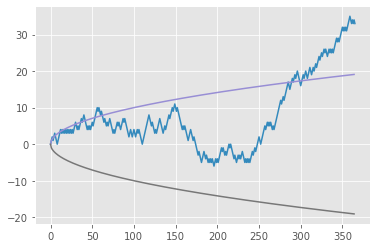

In [4]:
index = np.arange(x)

posistd = np.std(positions)

rwrangemax = index
rwrangemin = index*(-1)

rwrangepmax = np.sqrt(index)
rwrangepmin = np.sqrt(index)*(-1)


#dfrw = pd.concat([index, positions, invpositions], axis=1, keys=['Index', 'Positions', 'invpositions'])

#plt.plot(mt)
plt.plot(posistd)
plt.plot(positions)

#plt.plot(rwrangemax)
#plt.plot(rwrangemin)

plt.plot(rwrangepmax)
plt.plot(rwrangepmin)

plt.show()

#print(positions)
#print(posistd)
#print(dfrw)